#  Sentiment Analysis of Tweets or Product Reviews 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
data = pd.read_csv("C:/Users/NishaEzhil/Downloads/ZOMATO.csv")
data

,ID,Area,City,Restaurant Price,Avg Rating,Total Rating,Food Item,Food Type,Delivery Time,Review
0,1,Suburb,Ahmedabad,600,4.2,6198,Sushi,Fast Food,30-40 min,"Good, but nothing extraordinary."
1,2,Business District,Pune,200,4.7,4865,Pepperoni Pizza,Non-Vegetarian,50-60 min,"Good, but nothing extraordinary."
2,3,Suburb,Bangalore,600,4.7,2095,Waffles,Fast Food,50-60 min,Late delivery ruined it.
3,4,Business District,Mumbai,900,4.0,6639,Sushi,Vegetarian,50-60 min,Best meal I've had in a while!
4,5,Tech Park,Mumbai,200,4.7,6926,Spring Rolls,Gluten-Free,20-30 min,Mediocre experience.
...,...,...,...,...,...,...,...,...,...,...
7995,7996,City Center,Mumbai,300,4.0,3303,BBQ Ribs,Vegan,20-30 min,My new favorite dish!
7996,7997,Downtown,Chennai,100,4.7,8742,Butter Chicken,Non-Vegetarian,20-30 min,Amazing taste and quick delivery.
7997,7998,Tech Park,Chennai,900,4.5,4645,Mango Shake,Fast Food,30-40 min,Nothing special but edible.
7998,7999,Old Town,Delhi,500,4.2,3218,Grilled Cheese,Non-Vegetarian,50-60 min,It was okay.


In [10]:
data.describe()

,ID,Restaurant Price,Avg Rating,Total Rating
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,544.587500,4.129900,4979.977500
std,2309.54541,287.968871,0.645791,2877.285148
min,1.00000,100.000000,3.000000,51.000000
25%,2000.75000,300.000000,3.500000,2476.000000
50%,4000.50000,500.000000,4.200000,4989.500000
75%,6000.25000,800.000000,4.700000,7498.000000
max,8000.00000,1000.000000,5.000000,10000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8000 non-null   int64  
 1   Area              8000 non-null   object 
 2   City              8000 non-null   object 
 3   Restaurant Price  8000 non-null   int64  
 4   Avg Rating        8000 non-null   float64
 5   Total Rating      8000 non-null   int64  
 6   Food Item         8000 non-null   object 
 7   Food Type         8000 non-null   object 
 8   Delivery Time     8000 non-null   object 
 9   Review            8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


In [13]:
data.isnull().sum()

ID                  0
Area                0
City                0
Restaurant Price    0
Avg Rating          0
Total Rating        0
Food Item           0
Food Type           0
Delivery Time       0
Review              0
dtype: int64

In [14]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating',
       'Food Item', 'Food Type', 'Delivery Time', 'Review'],
      dtype='object')

In [20]:
# (0 = Negative, 1 = Positive)
def assign_sentiment(text):
    text = text.lower()
    negative_keywords = ['bad', 'late', 'nothing special', 'okay', 'not good']
    for word in negative_keywords:
        if word in text:
            return 0
    return 1

data['Sentiment'] = data['Review'].apply(assign_sentiment)
data[['Review', 'Sentiment']].head(10)


,Review,Sentiment
0,"Good, but nothing extraordinary.",1
1,"Good, but nothing extraordinary.",1
2,Late delivery ruined it.,0
3,Best meal I've had in a while!,1
4,Mediocre experience.,1
5,Best meal I've had in a while!,1
6,Amazing taste and quick delivery.,1
7,My new favorite dish!,1
8,Absolutely loved it!,1
9,Superb packaging and presentation.,1


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['Cleaned_Review'] = data['Review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NishaEzhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Predict positive/negative sentiment from text.

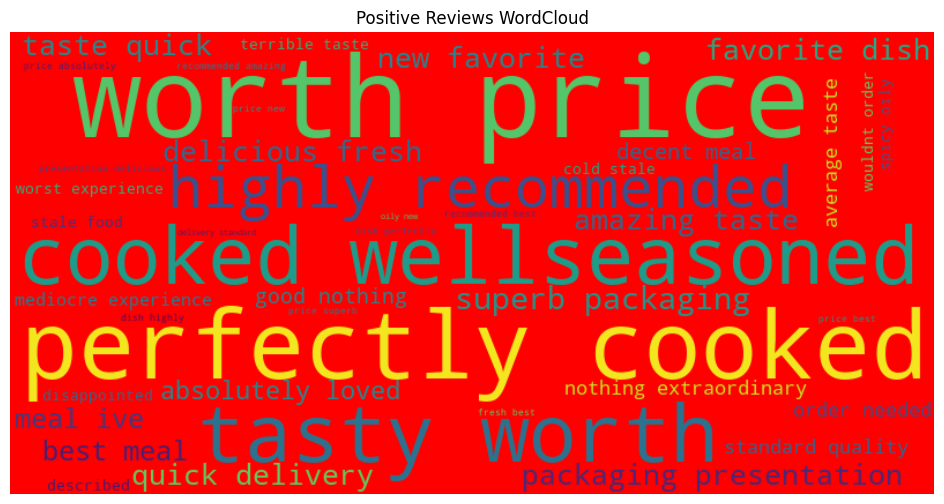

In [33]:
# Positive reviews
positive_text = " ".join(data[data['Sentiment'] == 1]['Cleaned_Review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='red').generate(positive_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()



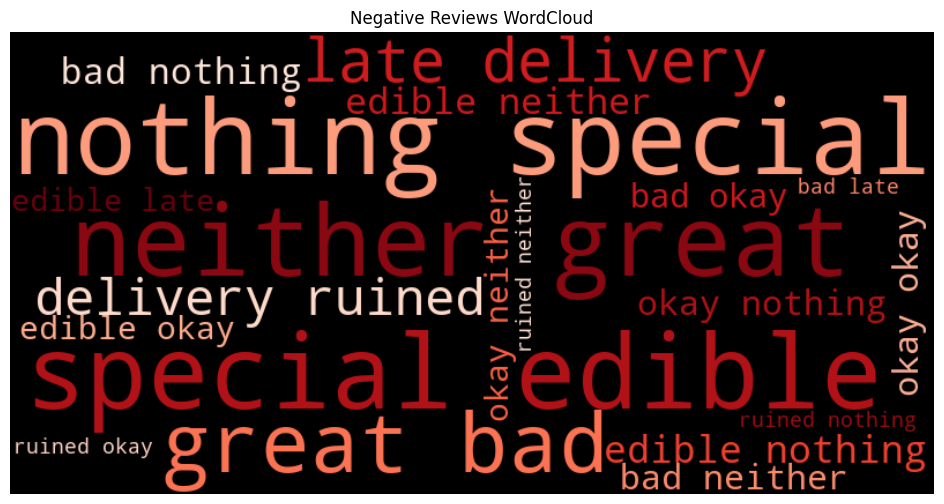

In [ ]:
# Negative reviews
negative_text = " ".join(data[data['Sentiment'] == 0]['Cleaned_Review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


# TF-IDF

In [36]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [40]:
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00      1411

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Accuracy: 1.0
